In [76]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
%config IPCompleter.greedy=True

Now it's time for another guided example. This time we're going to look at recipes. Specifically we'll use the epicurious dataset, which has a collection of recipes, key terms and ingredients, and their ratings.

What we want to see is if we can use the ingredient and keyword list to predict the rating. For someone writing a cookbook this could be really useful information that could help them choose which recipes to include because they're more likely to be enjoyed and therefore make the book more likely to be successful.

First let's load the dataset. It's [available on Kaggle](https://www.kaggle.com/hugodarwood/epirecipes). We'll use the csv file here and as pull out column names and some summary statistics for ratings.

In [3]:
raw_data = pd.read_csv('epi_r.csv')

In [4]:
raw_data.describe()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
count,20052.000000,1.593500e+04,15890.000000,1.586900e+04,1.593300e+04,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,...,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000
mean,3.714467,6.322958e+03,100.160793,3.468775e+02,6.225975e+03,0.000299,0.000050,0.000848,0.001346,0.000349,...,0.001247,0.026332,0.000050,0.000299,0.014861,0.000150,0.000349,0.001396,0.000948,0.022741
std,1.340829,3.590460e+05,3840.318527,2.045611e+04,3.333182e+05,0.017296,0.007062,0.029105,0.036671,0.018681,...,0.035288,0.160123,0.007062,0.017296,0.121001,0.012231,0.018681,0.037343,0.030768,0.149080
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,1.980000e+02,3.000000,7.000000e+00,8.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.375000,3.310000e+02,8.000000,1.700000e+01,2.940000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.375000,5.860000e+02,27.000000,3.300000e+01,7.110000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,3.011122e+07,236489.000000,1.722763e+06,2.767511e+07,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
list(raw_data.columns)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

In [13]:
raw_data[(raw_data.yuca > 0) & (raw_data.rating >= 4) ]

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
1559,Shrimp in Yuca Coconut Purée,5.000,760.0,23.0,13.0,1196.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
13681,Red Snapper Yuca Cakes with Mojo de Ajo,4.375,314.0,19.0,13.0,698.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
17706,Dominican Sancocho,4.375,609.0,38.0,31.0,243.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
19688,Ceviche de Pescado,4.375,387.0,37.0,4.0,713.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


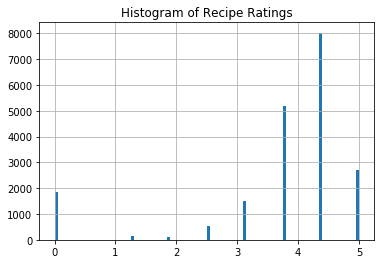

In [6]:
raw_data.rating.hist(bins=100)
plt.title('Histogram of Recipe Ratings')
plt.show()

So a few things are shown in this histogram. Firstly there are sharp discontinutities. We don't have continuous data. No recipe has a 3.5 rating, for example. Also we see the anticipated increase at 0.

Let's try a naive approach again, this time using SVM Regressor. But first, we'll have to do a bit of data cleaning.

In [14]:
# Count nulls 
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

What we can see right away is that nutrition information is not available for all goods. Now this would be an interesting data point, but let's focus on ingredients and keywords right now. So we'll actually drop the whole columns for calories, protein, fat, and sodium. We'll come back to nutrition information later.

In [15]:
from sklearn.svm import SVR
svr = SVR()
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1)
Y = raw_data.rating
svr.fit(X,Y)

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

__Note that this actually takes quite a while to run, compared to some of the models we've done before. Be patient.__ It's because of the number of features we have.

Let's see what a scatter plot looks like, comparing actuals to predicted.

In [ ]:
plt.scatter(Y, svr.predict(X))

Now that is a pretty useless visualization. This is because of the discontinous nature of our outcome variable. There's too much data for us to really see what's going on here. If you wanted to look at it you could create histograms, here we'll move on to the scores of both our full fit model and with cross validation. Again if you choose to run it again it will take some time, so you probably shouldn't.

In [9]:
svr.score(X, Y)

0.038565706512988962

In [10]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr, X, Y, cv=5)

array([ 0.01818511,  0.026411  ,  0.03037705,  0.01957949,  0.02451197])

Oh dear, so this did seem not to work very well. In fact it is remarkably poor. Now there are many things that we could do here. 

Firstly the overfit is a problem, even though it was poor in the first place. We could go back and clean up our feature set. There might be some gains to be made by getting rid of the noise.

We could also see how removing the nulls but including dietary information performs. Though its a slight change to the question we could still possibly get some improvements there.

Lastly, we could take our regression problem and turn it into a classifier. With this number of features and a discontinuous outcome, we might have better luck thinking of this as a classification problem. We could make it simpler still by instead of classifying on each possible value, group reviews to some decided high and low values.

__And that is your challenge.__

Transform this regression problem into a binary classifier and clean up the feature set. You can choose whether or not to include nutritional information, but try to cut your feature set down to the 30 most valuable features.

Good luck!

When you've finished that, also take a moment to think about bias. Is there anything in this dataset that makes you think it could be biased, perhaps extremely so?

There is. Several things in fact, but most glaringly is that we don't actually have a random sample. It could be, and probably is, that the people more likely to choose some kinds of recipes are more likely to give high reviews.

After all, people who eat chocolate _might_ just be happier people.

# 1. Transform this regression problem into a binary classifier

### Cleanup data

In [6]:
# Drop rows with tons of NAs
raw_data.drop(columns=['calories', 'protein', 'fat', 'sodium'], inplace=True)

### Make binary at `ranking > 4`: `is_top_rated`

In [11]:
raw_data['is_top_rated'] = (raw_data.rating > 4)

In [14]:
(raw_data.is_top_rated == True).sum()

10738

# 2. Choose 30 most valuable features

In [16]:
df = raw_data

In [21]:
df

,title,rating,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,...,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey,is_top_rated
0,"Lentil, Apple, and Turkey Wrap",2.500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,False
1,Boudin Blanc Terrine with Red Onion Confit,4.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
2,Potato and Fennel Soup Hodge,3.750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
3,Mahi-Mahi in Tomato Olive Sauce,5.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
4,Spinach Noodle Casserole,3.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
5,The Best Blts,4.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
6,Ham and Spring Vegetable Salad with Shallot Vi...,4.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
7,Spicy-Sweet Kumquats,3.750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
8,Korean Marinated Beef,4.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
9,Ham Persillade with Mustard Potato Salad and M...,3.750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False


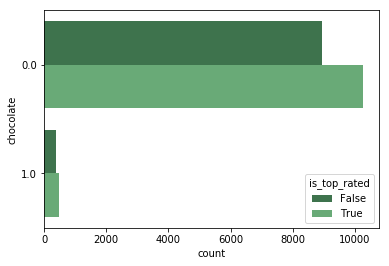

is_top_rated  False  True 
chocolate                 
0.0            8940  10257
1.0             374    481
Power_divergenceResult(statistic=16951.966886096154, pvalue=0.0)


In [77]:
# Plot counts for each combination of levels.
sns.countplot(y="chocolate", hue="is_top_rated", data=df, palette="Greens_d")
plt.show()

# # Table of counts
counttable = pd.crosstab(df['chocolate'], df['is_top_rated'])
print(counttable)
print(stats.chisquare(counttable, axis=None))

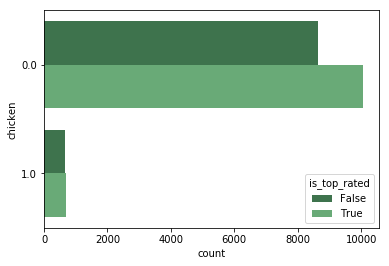

is_top_rated  False  True 
chicken                   
0.0            8651  10057
1.0             663    681
Power_divergenceResult(statistic=15233.53361260722, pvalue=0.0)


In [78]:
# Plot counts for each combination of levels.
sns.countplot(y="chicken", hue="is_top_rated", data=df, palette="Greens_d")
plt.show()

# # Table of counts
counttable = pd.crosstab(df['chicken'], df['is_top_rated'])
print(counttable)
print(stats.chisquare(counttable, axis=None))

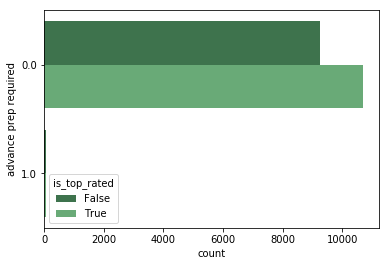

is_top_rated           False  True 
advance prep required              
0.0                     9257  10686
1.0                       57     52


In [24]:
# Plot counts for each combination of levels.
sns.countplot(y="advance prep required", hue="is_top_rated", data=df, palette="Greens_d")
plt.show()

# # Table of counts
counttable = pd.crosstab(df['advance prep required'], df['is_top_rated'])
print(counttable)

In [27]:
df_small = df.iloc[0:1000,:]
df_small

,title,rating,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,...,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey,is_top_rated
0,"Lentil, Apple, and Turkey Wrap",2.500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,False
1,Boudin Blanc Terrine with Red Onion Confit,4.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
2,Potato and Fennel Soup Hodge,3.750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
3,Mahi-Mahi in Tomato Olive Sauce,5.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
4,Spinach Noodle Casserole,3.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
5,The Best Blts,4.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
6,Ham and Spring Vegetable Salad with Shallot Vi...,4.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
7,Spicy-Sweet Kumquats,3.750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
8,Korean Marinated Beef,4.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
9,Ham Persillade with Mustard Potato Salad and M...,3.750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False


In [57]:
df.mean(0).sort_values().tail(31)

vegan                0.092310
fruit                0.097646
milk/cream           0.099491
sauté                0.101935
vegetable            0.104079
tomato               0.106723
onion                0.111610
kidney friendly      0.115350
healthy              0.117245
sugar conscious      0.122980
dinner               0.134899
fall                 0.150359
winter               0.154548
no sugar added       0.156194
side                 0.157141
dairy free           0.159884
dessert              0.178187
summer               0.207012
bake                 0.220078
wheat/gluten-free    0.244664
quick & easy         0.267903
pescatarian          0.301317
kosher               0.307949
gourmet              0.331538
vegetarian           0.341412
tree nut free        0.351287
soy free             0.403351
peanut free          0.418412
bon appétit          0.466537
is_top_rated         0.535508
rating               3.714467
dtype: float64

In [59]:
most_freq_cols = ['vegan',
'fruit',
'milk/cream',
'sauté',
'vegetable',
'tomato',
'onion',
'kidney friendly',
'healthy',
'sugar conscious',
'dinner',
'fall',
'winter',
'no sugar added',
'side',
'dairy free',
'dessert',
'summer',
'bake',
'wheat/gluten-free',
'quick & easy',
'pescatarian',
'kosher',
'gourmet',
'vegetarian',
'tree nut free',
'soy free',
'peanut free',
'bon appétit',
'is_top_rated',
]

In [67]:
for a,b in df_small.mean(0).sort_values().tail(31).items():
    if b > 0.04:
        print(a)

spring
milk/cream
healthy
sauté
kid-friendly
tomato
onion
vegetable
sugar conscious
kidney friendly
side
fall
winter
dinner
dairy free
dessert
no sugar added
summer
bake
wheat/gluten-free
quick & easy
pescatarian
kosher
gourmet
vegetarian
tree nut free
soy free
peanut free
bon appétit
is_top_rated
rating


# Try thirty most commonly non-zero columns

In [68]:
freq_df = raw_data[most_freq_cols]
freq_df

,vegan,fruit,milk/cream,sauté,vegetable,tomato,onion,kidney friendly,healthy,sugar conscious,...,quick & easy,pescatarian,kosher,gourmet,vegetarian,tree nut free,soy free,peanut free,bon appétit,is_top_rated
0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,True
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,False
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,True
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,False
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,True
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,True
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,False
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,True
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,False


                      vegan     fruit  milk/cream     sauté  vegetable  \
vegan              1.000000  0.050645   -0.103697 -0.024873   0.067337   
fruit              0.050645  1.000000    0.004039 -0.050857  -0.033444   
milk/cream        -0.103697  0.004039    1.000000 -0.000198  -0.056547   
sauté             -0.024873 -0.050857   -0.000198  1.000000   0.056817   
vegetable          0.067337 -0.033444   -0.056547  0.056817   1.000000   
tomato             0.001371 -0.097924   -0.076038  0.075195   0.037697   
onion              0.014997 -0.059508   -0.047971  0.130794   0.037898   
kidney friendly    0.092488  0.068447    0.103728 -0.082957  -0.072462   
healthy            0.198670 -0.017529   -0.093171  0.019649   0.059551   
sugar conscious    0.091995 -0.104255   -0.044312  0.029927   0.018569   
dinner            -0.031620 -0.076294   -0.069316  0.043552   0.015520   
fall              -0.021361  0.086770    0.026120  0.053340   0.083709   
winter            -0.047218  0.036436 

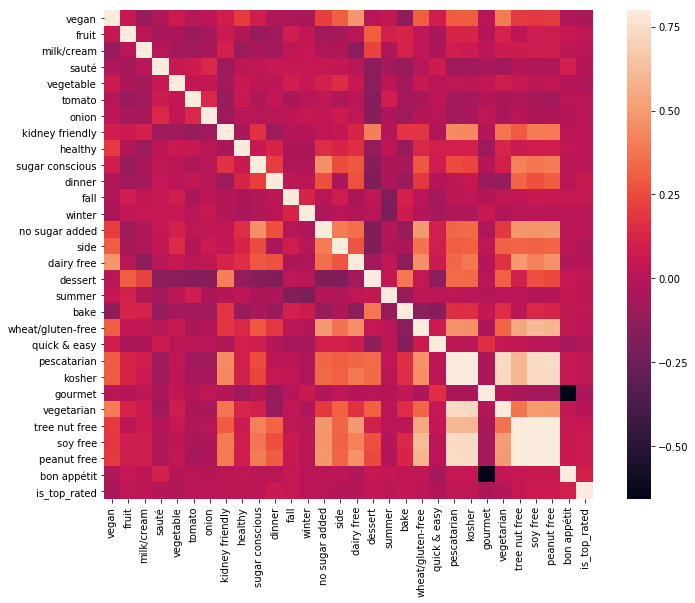

In [74]:
# Make the correlation matrix.
corrmat = freq_df.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [84]:
freq_df.corrwith(freq_df.is_top_rated)

vegan               -0.039458
fruit                0.029467
milk/cream           0.015254
sauté               -0.004157
vegetable           -0.028359
tomato               0.012635
onion                0.012554
kidney friendly      0.021089
healthy              0.010885
sugar conscious      0.016575
dinner               0.062186
fall                 0.046565
winter               0.011469
no sugar added       0.010409
side                -0.017965
dairy free          -0.003503
dessert              0.036225
summer               0.016068
bake                 0.031329
wheat/gluten-free    0.015073
quick & easy        -0.031327
pescatarian          0.029739
kosher               0.026477
gourmet             -0.032085
vegetarian          -0.006555
tree nut free        0.047943
soy free             0.065799
peanut free          0.065897
bon appétit          0.097076
is_top_rated         1.000000
dtype: float64

In [82]:
freq_df.corr().unstack().sort_values().drop_duplicates().tail(40)

dairy free         kosher               0.388698
peanut free        kidney friendly      0.393128
                   sugar conscious      0.397160
vegan              vegetarian           0.398954
soy free           kidney friendly      0.400354
side               no sugar added       0.400795
kidney friendly    dessert              0.409538
dairy free         soy free             0.414360
tree nut free      sugar conscious      0.417259
kidney friendly    kosher               0.435470
pescatarian        kidney friendly      0.447445
sugar conscious    no sugar added       0.458361
wheat/gluten-free  dairy free           0.458528
                   kosher               0.462679
peanut free        dairy free           0.471571
pescatarian        wheat/gluten-free    0.473998
soy free           no sugar added       0.480710
no sugar added     tree nut free        0.483948
vegan              dairy free           0.484213
peanut free        no sugar added       0.491092
wheat/gluten-free  n

## Run Binary SVM

In [70]:
from sklearn.svm import SVR
svr_bin = SVR()
X = freq_df.drop(['is_top_rated'], 1)
Y = freq_df.is_top_rated
svr_bin.fit(X,Y)

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [71]:
svr_bin.score(X, Y)

-0.12228905427707182

In [73]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr_bin, X, Y, cv=5)

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

array([-0.15647487, -0.16756332, -0.16414021, -0.16678465, -0.1665808 ])

# New approach: reduce to 30 highest correlated variables

## QUESTIONS/CONCERNS:
- None if these approaches seem to work even remotely well. We'd be better of guessing randomly. Why...
- What are better features? I could
    - Try to find MULTIPLE features who together correlate well with being a top ranked recipe
    - ?

In [89]:
most_corr = df.corrwith(df.is_top_rated).apply(lambda n: abs(n)).sort_values()

In [103]:
most_corr

duck                       0.000022
egg                        0.000078
chambord                   0.000119
bulgur                     0.000169
nutmeg                     0.000226
hanukkah                   0.000248
ramadan                    0.000261
couscous                   0.000291
sesame                     0.000329
quick and healthy          0.000338
tropical fruit             0.000363
breakfast                  0.000388
hot drink                  0.000434
macadamia nut              0.000450
snack week                 0.000568
picnic                     0.000585
butter                     0.000587
parade                     0.000686
peru                       0.000711
israel                     0.000711
louisville                 0.000711
hummus                     0.000711
dominican republic         0.000711
miami                      0.000711
iced coffee                0.000711
potato salad               0.000711
custard                    0.000711
new orleans                0

In [96]:
most_corr_cols = []
for name,_ in most_corr.tail(32).items():
    most_corr_cols.append(name)
most_corr_cols = most_corr_cols[:-2]
most_corr_cols

['dessert',
 "father's day",
 'stir-fry',
 'vegan',
 'goat cheese',
 'rum',
 'harpercollins',
 'stuffing/dressing',
 'grill',
 'pasta',
 'cocktail',
 'fall',
 'backyard bbq',
 'tree nut free',
 'low fat',
 'grill/barbecue',
 'bitters',
 'christmas',
 'spirit',
 'dinner',
 'cocktail party',
 'soy free',
 'peanut free',
 'thanksgiving',
 'roast',
 'gin',
 'alcoholic',
 'drink',
 'house & garden',
 'bon appétit']

                    dessert  father's day  stir-fry     vegan  goat cheese  \
dessert            1.000000     -0.035250 -0.049826 -0.001721    -0.049571   
father's day      -0.035250      1.000000 -0.013075 -0.016072     0.018499   
stir-fry          -0.049826     -0.013075  1.000000  0.006588    -0.013343   
vegan             -0.001721     -0.016072  0.006588  1.000000    -0.039765   
goat cheese       -0.049571      0.018499 -0.013343 -0.039765     1.000000   
rum                0.073663     -0.012580 -0.010163 -0.016976    -0.016154   
harpercollins     -0.002626     -0.009521 -0.008337  0.001847    -0.004471   
stuffing/dressing -0.038762     -0.005162 -0.008908 -0.016127    -0.000554   
grill             -0.072121      0.174627 -0.018204 -0.020906    -0.004016   
pasta             -0.103047     -0.002398  0.002291 -0.033241     0.021185   
cocktail          -0.063761     -0.001794 -0.014872 -0.021579    -0.017330   
fall               0.030543     -0.031703 -0.005449 -0.021361   

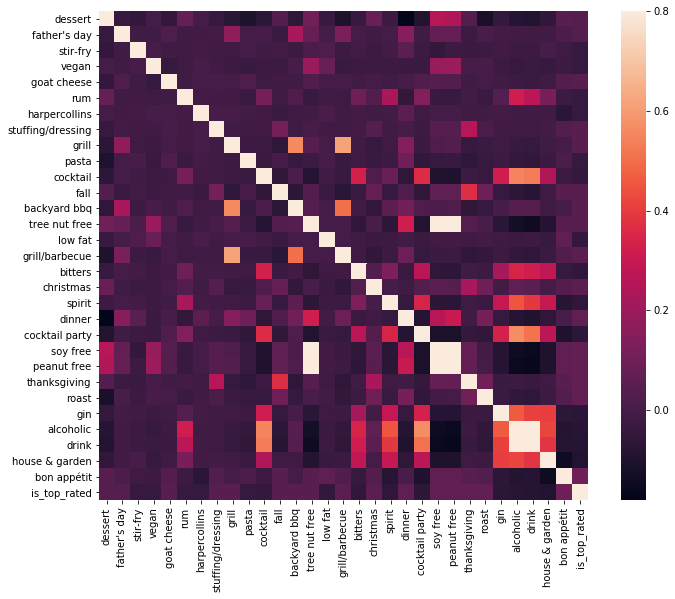

In [102]:
# Make the correlation matrix.
corrmat = df[most_corr_cols + ['is_top_rated']].corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [100]:
from sklearn.svm import SVR
svr_bin_2 = SVR()
X_2 = df[most_corr_cols]
Y_2 = df.is_top_rated
svr_bin_2.fit(X_2,Y_2)

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [104]:
svr_bin_2.score(X_2, Y_2)

-0.12663371037452675

In [105]:
cross_val_score(svr_bin_2, X_2, Y_2, cv=5)

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

array([-0.17186768, -0.12718638, -0.13265744, -0.19883235, -0.11476572])